In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from tqdm import tqdm

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42) 

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)

In [13]:
print(torch.initial_seed()) 

42


In [14]:
START = '1960-01-01'
TICKER = '^GSPC' # S&P500 Index

data = yf.download(
    TICKER,
    start = START,
    progress = False,
    interval = '1wk'
)

In [15]:
returns = data['Close'].pct_change(1).dropna()

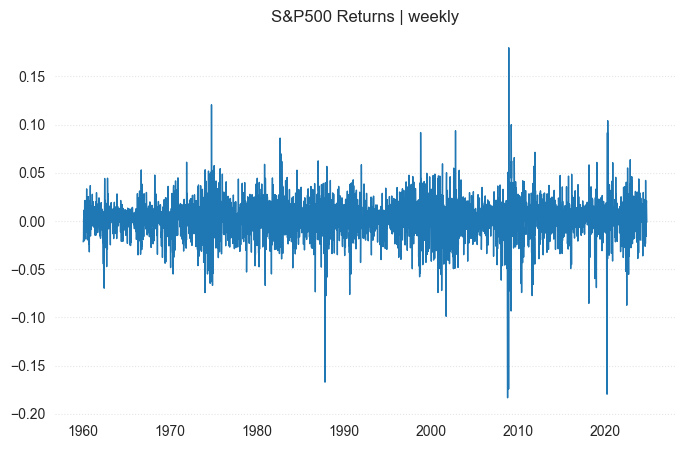

In [16]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(
    returns,
    lw = 1
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.title('S&P500 Returns | weekly')
plt.show()

In [20]:
from FinancialDeepLearning.tsa.rnn import SimpleRecurrentNeuralNet

rnn = SimpleRecurrentNeuralNet(
    data = returns,
    p = 2,
    method = 'rnn'
)

In [21]:
simple_rnn = rnn.fit(
    criterion = 'mse',
    optimizer = 'adam',
    activation_function = 'sigmoid',
    num_layers = 10
)

100%|██████████| 10/10 [00:51<00:00,  5.18s/it]


In [22]:
print(rnn.summary())

                        RNN Results
Dep. Variable: predicted        No. Observations: 3376      
Model:         RNN(2)           Log Likelihood    8119.070  
Date:          Mon, 30 Sep 2024 AIC               -16230.140
Time:          01:23:48         BIC               -16205.642
Sample:        3376             HQIC              -16221.381
-------------------------------------------------------------
           coef   std err     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------
const     0.4340   0.0009  498.3135  0.0000   0.4322   0.4357
RNN.L1   -0.5146   0.0174  -29.6230  0.0000  -0.5486  -0.4805
RNN.L2    0.0094   0.0174    0.5421  0.5878  -0.0246   0.0435
------------------------------------------------------------
Ljung-Box (L1) (Q):       30.12   Jarque-Bera (JB):  9580.92
Prob(Q):                  0.00    Prob(JB):          0.00   
Heteroskedasticity (H):   145.87  Skew:              -0.66  
Prob(H) (two-sided):      0.00    Kurtosis:

In [23]:
list(simple_rnn.named_parameters())

[('rnn.weight_ih_l0',
  Parameter containing:
  tensor([[-0.6746, -0.0607],
          [ 0.3342,  0.2837]], requires_grad=True)),
 ('rnn.weight_hh_l0',
  Parameter containing:
  tensor([[ 0.5709,  0.6441],
          [-0.5607,  0.1780]], requires_grad=True)),
 ('rnn.bias_ih_l0',
  Parameter containing:
  tensor([-0.4939,  0.1321], requires_grad=True)),
 ('rnn.bias_hh_l0',
  Parameter containing:
  tensor([-0.7190,  0.8537], requires_grad=True)),
 ('rnn.weight_ih_l1',
  Parameter containing:
  tensor([[-0.7334,  0.5990],
          [-0.0119,  0.4961]], requires_grad=True)),
 ('rnn.weight_hh_l1',
  Parameter containing:
  tensor([[-0.3823,  0.6427],
          [ 0.1554,  0.0910]], requires_grad=True)),
 ('rnn.bias_ih_l1',
  Parameter containing:
  tensor([-0.4192,  0.5465], requires_grad=True)),
 ('rnn.bias_hh_l1',
  Parameter containing:
  tensor([ 0.0979, -0.0742], requires_grad=True)),
 ('rnn.weight_ih_l2',
  Parameter containing:
  tensor([[ 0.8287,  0.4293],
          [-0.0666,  0.0141]